# Title

us

# Abstract

In [ ]:
# todo Nathaniel

# Introduction

The photoelectric effect occurs when light is shined on a metal surface, electrons may be ejected from the surface of the metal. Following the wave theory of light, the kinetic energy of emitted photoelectrons would be proportional to the light intensity. However, Philip Lenard discovered that the maximum kinetic energy of photoelectrons did not depend on the intensity of the light amplitude. In 1905, Albert Einstein published “A Heuristic Point of View About the Generation and Transformation of Light.” Besides creating the theory of light quanta, Einstein explained the photoelectric effect and that light is composed of quanta of energy called photons, each containing energy equivalent to hf.

From the relationship between the stopping potential and the reciprocal of the wavelength, we have determined the value of Planck’s constant from the slope of this function. 

# Procedure

In [1]:
# todo Nathaniel

# Data and Calculations

In [9]:
bluefilter = [
    .904, .964, .611,
    .923, .927, .896,
    .677, .744, .857
]

greenfilter = [
    .548, .478, .505,
    .528, .491, .474,
    .493, .548, .583
]

redfilter = [
    .435, .442, .441,
    .412, .399, .443,
    .391, .434, .421
]

avgV_blue = (.904 + .964 + .611 + .923 + .927 + .896 + .677 + .744 + .857)/9
avgV_green = (.548 + .478 + .505 + .528 + .491 + .474 + .493 + .548 + .583)/9
avgV_red = (.435 + .442 + .441 + .412 + .399 + .443 + .391 + .434 + .421)/9

print(avgV_blue, "V - Average value for stopping voltage for blue filter")
print(avgV_green, "V - Average value for stopping voltage for green filter")
print(avgV_red, "V - Average value for stopping voltage for red filter")

0.8336666666666668 V - Average value for stopping voltage for blue filter
0.5164444444444444 V - Average value for stopping voltage for green filter
0.4242222222222222 V - Average value for stopping voltage for red filter


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
%matplotlib inline

global C
global e
global H
global WL_RED
global WL_GREEN 
global WL_BLUE

C = 2.998e8
e = 1.602e-19
H = 6.626e-34
WL_RED = 590e-9
WL_GREEN = 546e-9
WL_BLUE = 436e-9

E_red = (H*C)/WL_RED * 1/e
E_green = (H*C)/WL_GREEN * 1/e
E_blue = (H*C)/WL_BLUE * 1/e

print(E_red, "eV - Energy of red filter")
print(E_green, "eV - Energy of green filter")
print(E_blue, "eV - Energy of blue filter")

2.101689413656658 eV - Energy of red filter
2.2710563261125056 eV - Energy of green filter
2.844029252425294 eV - Energy of blue filter


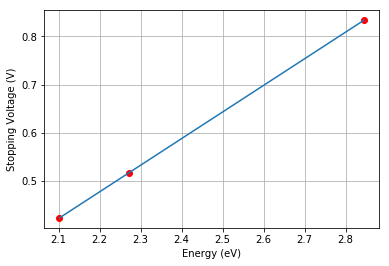

5.34356237491661 - Experimental value for h
19.354627604639152 - Percent Error for h


In [16]:
xdata = [E_red,E_green,E_blue]
#xdata = [1/WL_RED,1/WL_GREEN,1/WL_BLUE]
ydata = [avgV_red,avgV_green,avgV_blue]

def func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata, 'ro')
plt.xlabel("Energy (eV)")
plt.ylabel("Stopping Voltage (V)")
plt.plot(xdata, np.polyval(popt, xdata), '-')
#plt.text(0.5, 90, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
#plt.text(0.5, 80, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
#plt.text(0.5, 70, r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))
plt.grid()
plt.show()

a = 1
h = a*(1.602*10/2.998)
percent_error = (abs(h - 6.626)/6.626) * 100

print(h, "- Experimental value for h")
print(percent_error, "- Percent Error for h")

# Conclusion

The theoretical value of Planck’s constant was 6.626 X 10^-34 Js. Our measured value of Planck’s constant was determined to be 5.344 X 10^-34. The percent error in our measured value was calculated to be 19.35%. Due to the magnitude of the percent error, this experimental outcome can be deemed unsuccessful. To have more accurate results, perhaps the amplifier should have been placed closer to the photodiode.

# References

Serway, R. A., Moses, C. J., & Moyer, C. A. (2004). Modern Physics (3rd ed.). Belmont, CA: Brooks/Cole. 

Photoelectric effect. Retrieved October 11, 2017, from
https://www.khanacademy.org/science/physics/quantumphysics/photons/a/photoelectric-effect 